# Feature Engineering

What are features?
- Variables we use to help predict our target
- Not all of the independent variables we start with
- The independent variables we END with (the ones we use in modeling)

Why would we choose to use some features and not others?
- Doesn't influence the target
- May overfit the model
    - Spurious correlation due to variable being generated based on target after target has already been established
- Too many missing values
- Dependency between attributes
- Categorical with too many values and can't encode
- Variable too computationally expensive
- Discriminatory variable (e.g. redlining)
- Information that reveals too much personal information

Why would we create new features?
- Problem: Dependency between 2 variables too high
    - Solution: blend them into one (ex. bedrooms and bathrooms in a house; just one of these doesn't provide all of the information needed, but they are too dependent on each other to treat as separate features, so they can be combined)
- Problem: Categorical with too many values
    - Solution: Binning into fewer categories
- Problem: Continuous variables with a lot of noise
    - Solution: Binning or cutting
- Calculation of 2 variables, like length x width

Why do we try to limit the number of features?
- Curse of Dimensionality
    - The more dimensions there are, the harder it is to find the common patterns, and the sample size needs to be larger and larger to find small but important patterns in the sample. 

What is it?
- Creating new features
- Removing features
- Selecting top features
- Transforming features

#### "If you want to improve your model, improve your features. You will find a better result doing this instead of just throwing additional algorithms at the problem."

#### "I want to make it easy for the computer to see the patterns"

Algorithmic Feature Selection Methods:

- Filter Feature Selection methods
    - Look at the features with the highest correlation to the target and select those features. 
    - Wouldn't have the ability to check for things like confidential info/discrimination. 
    - Wouldn't be able to identify if the top features are all giving the same information (e.g. using one of them is no better than using three of them). 
    
- Wrapper Feature selection methods
    - Create n different models, evaluate performance, and the features that are in the model that performed the best are the ones to keep. 
    - Computationally expensive. 
    
Importance of scaling:

If the scale/magnitude of the variables differ, the algorithm will give an inflated importance to the larger variable. Scale variables before they are passed to the model! (Do not scale the y variable)

##### Features are the difference!

### Math Student Grades

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2 sex - student's sex (binary: "F" - female or "M" - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: "U" - urban or "R" - rural)  
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12 guardian - student's guardian (nominal: "mother", "father" or "other")  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math:

31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

#### We will aim to predict G3.

### First Pass  
- take care of nulls
- data errors
- data types
- dummy vars
- split
- scaling
- features (select kbest, recursive feature engineering)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Wrangle

#### Acquire

Acquire from local drive

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


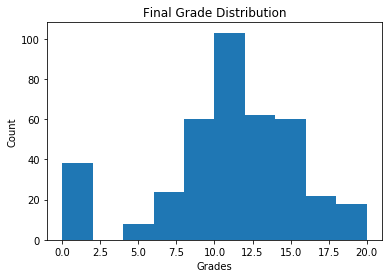

In [6]:
plt.hist(df.G3)
plt.title('Final Grade Distribution')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.show()

#### Object Columns

How many unique values in each column? We need to answer this so that we know if creating dummy variables makes sense (or if it ends up creating way too many columns).

1. Create a boolean mask of the columns indicating whether the datatype is object or not.

In [7]:
mask = np.array(df.dtypes == 'object')
mask

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False])

2. Filter the dataframe columns by using the mask

In [8]:
# using iloc, the df will filter out all the index locations 
# (columns number) where mast is false 

obj_df = df.iloc[:, mask]
obj_df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [9]:
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


3. loop through all the object columns and generate value counts of each unique value.

In [10]:
# loop through each column name in the list of columns
# print the value_counts 

for col in obj_df.columns:
    print(obj_df[col].value_counts(), '\n')

GP    349
MS     46
Name: school, dtype: int64 

F    208
M    187
Name: sex, dtype: int64 

U    307
R     88
Name: address, dtype: int64 

GT3    281
LE3    114
Name: famsize, dtype: int64 

T    354
A     41
Name: Pstatus, dtype: int64 

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64 

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64 

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64 

mother    273
father     90
other      32
Name: guardian, dtype: int64 

no     344
yes     51
Name: schoolsup, dtype: int64 

yes    242
no     153
Name: famsup, dtype: int64 

no     214
yes    181
Name: paid, dtype: int64 

yes    201
no     194
Name: activities, dtype: int64 

yes    314
no      81
Name: nursery, dtype: int64 

yes    375
no      20
Name: higher, dtype: int64 

yes    329
no      66
Name: internet, dtype: int64 

no    

In [11]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

#### Dummy Variables

In [12]:
# create df with new dummy vars
dummy_df = pd.get_dummies(obj_df, dummy_na=False, drop_first=True)

In [13]:
# concatenate the dataframe with dummies to our original dataframe
# via column (axis=1)
df = pd.concat([df, dummy_df], axis=1)

In [14]:
# drop object columns from df
df.drop(columns=obj_df.columns, inplace=True)

In [15]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [16]:
df.info() # All data is compatible with regression models (numeric)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    uint8
 17  sex_M           

#### Split

In [17]:
from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [18]:
train.shape, validate.shape, test.shape

((221, 42), (95, 42), (79, 42))

#### Split Into X & y dataframes

y = G3

In [19]:
# x df's are all cols except G3
X_train = train.drop(columns=['G3'])
X_validate = validate.drop(columns=['G3'])
X_test = test.drop(columns=['G3'])

# y df's are just G3
y_train = train[['G3']]
y_validate = validate[['G3']]
y_test = test[['G3']]

#### Scale

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

#### Feature Selection

1. SelectKBest
2. RFE:Recursive Feature Elimination

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns.values).set_index([X_train.index.values])
X_train_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.75,0.25,0.25,0.00,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.75,0.50,1.00,0.50,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.75,0.75,0.25,0.00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,1.00,0.25,0.75,0.00,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.75,1.00,0.25,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [22]:
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns=X_validate.columns.values).set_index([X_validate.index.values])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns.values).set_index([X_test.index.values])

In [23]:
from sklearn.feature_selection import SelectKBest, f_regression

Initialize the f_selector object (defines what test to run to determine significance)

In [24]:
f_selector = SelectKBest(f_regression, k=13)

Fit the object to our X and y data (train)

In [25]:
f_selector = f_selector.fit(X_train_scaled, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
f_selector = f_selector.fit(X_train_scaled, y_train.G3)

1. The correlation between each attribute & the target is computed.
2. Converted to an F-score and then p-value
3. Top k attributes are kept

In [27]:
X_train_reduced = f_selector.transform(X_train_scaled)
print(X_train_scaled.shape, X_train_reduced.shape)

(221, 41) (221, 13)


In [28]:
# Which columns are chosen (True) and which columns are eliminated (False)
f_support = f_selector.get_support() 
print(f_support)

[ True  True  True  True  True  True False False False False False False
 False  True  True False  True False False False False  True False False
 False False False False False False  True False  True False False False
 False False  True False False]


In [29]:
# We use .iloc, select all rows, and only select those columns who pass the boolean mask we developed
# Then we look at the columns in this df using .columns, and then convert those columns
# to a list using .tolist()
f_feature = X_train_scaled.iloc[:,f_support].columns.tolist()
f_feature

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'G1',
 'G2',
 'sex_M',
 'Mjob_other',
 'reason_reputation',
 'guardian_other',
 'higher_yes']

This new dataframe is ready for modeling!

In [30]:
# Passed in the f_support mask to create the dataframe with just the selected features
X_reduced_scaled = X_train_scaled.iloc[:,f_support]
X_reduced_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,G1,G2,sex_M,Mjob_other,reason_reputation,guardian_other,higher_yes
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.357143,0.578947,0.0,0.0,0.0,0.0,1.0
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.714286,0.789474,1.0,1.0,1.0,0.0,1.0
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.500000,0.526316,1.0,0.0,1.0,0.0,1.0
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,0.357143,0.368421,1.0,1.0,0.0,0.0,1.0
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.642857,0.578947,1.0,1.0,0.0,1.0,1.0


#### Recursive Feature Elimination: RFE

- Wrapper Method: Recursively build model after model with fewer and fewer features. It will then identify which model performs the best. Then return which features were used in that model. Those are the features we will keep. 

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Initialize the linear regression object

In [32]:
lm = LinearRegression()

Initialize the RFE object, setting the hyperparameters to be our linear model above (lm), and the number of features we want returned. 

In [33]:
rfe = RFE(lm, 13)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=13, step=1, verbose=0)

In [34]:
X_rfe = rfe.fit(X_train_scaled, y_train.G3)
X_rfe = rfe.transform(X_train_scaled)
# Above 2 lines of code can be combined using rfe.fit_transform(X_train_scaled, y_train.G3)

In [35]:
mask = rfe.support_
mask

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False])

In [36]:
X_reduced_scaled_rfe = X_train_scaled.iloc[:,mask]
X_reduced_scaled_rfe.head()

,age,traveltime,failures,famrel,absences,G1,G2,Mjob_health,Mjob_other,Mjob_services,schoolsup_yes,famsup_yes,internet_yes
142,0.000000,0.000000,0.000000,0.75,0.035714,0.357143,0.578947,0.0,0.0,0.0,0.0,1.0,1.0
326,0.333333,0.000000,0.000000,0.75,0.053571,0.714286,0.789474,0.0,1.0,0.0,0.0,0.0,1.0
88,0.166667,0.333333,0.333333,0.75,0.214286,0.500000,0.526316,0.0,0.0,1.0,0.0,0.0,1.0
118,0.333333,0.666667,0.333333,1.00,0.357143,0.357143,0.368421,0.0,1.0,0.0,0.0,1.0,1.0
312,0.666667,0.000000,0.333333,0.75,0.053571,0.642857,0.578947,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
X_reduced_scaled_rfe.columns.tolist() # Features selected using RFE

['age',
 'traveltime',
 'failures',
 'famrel',
 'absences',
 'G1',
 'G2',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'schoolsup_yes',
 'famsup_yes',
 'internet_yes']

In [38]:
X_reduced_scaled.columns.tolist() # Features selected using SelectKBest

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'G1',
 'G2',
 'sex_M',
 'Mjob_other',
 'reason_reputation',
 'guardian_other',
 'higher_yes']